### HEART DISEASE RISK PREDICTION

In [ ]:
#PROBLEM DEFINITION
# Predict a heart disease risk score using patient health data with classification models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, roc_auc_score)


In [3]:
#Load dataset
df = pd.read_csv("heart_disease_dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,1
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [7]:
#Data Cleaning
# Check missing values
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

In [8]:
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

In [10]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000,class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report :",classification_report(y_test, y_pred))

Accuracy: 0.6416938110749185
ROC-AUC: 0.6719208008406615
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.63      0.68       369
           1       0.54      0.67      0.60       245

    accuracy                           0.64       614
   macro avg       0.64      0.65      0.64       614
weighted avg       0.66      0.64      0.65       614



In [23]:
#Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Classification Report :",classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6188925081433225
ROC-AUC: 0.6526021790830153
Classification Report :               precision    recall  f1-score   support

           0       0.64      0.82      0.72       369
           1       0.54      0.31      0.40       245

    accuracy                           0.62       614
   macro avg       0.59      0.57      0.56       614
weighted avg       0.60      0.62      0.59       614



In [24]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
gb = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,random_state=42)
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [19]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

In [22]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))
print("Classification Report :",classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6596091205211726
ROC-AUC: 0.6757148387810408
Classification Report :               precision    recall  f1-score   support

           0       0.68      0.82      0.74       369
           1       0.61      0.42      0.50       245

    accuracy                           0.66       614
   macro avg       0.64      0.62      0.62       614
weighted avg       0.65      0.66      0.64       614



In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)


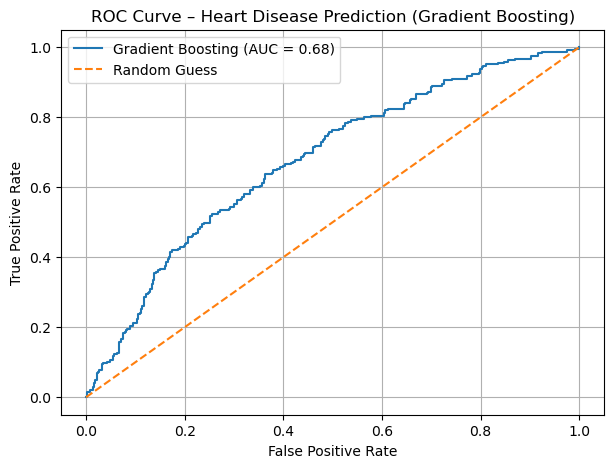

In [27]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Heart Disease Prediction (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.show()
